In [176]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MaxAbsScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MaxAbsScaler
from tpot.builtins import ZeroCount
from tpot.export_utils import set_param_recursive
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFwe, f_classif
from sklearn.naive_bayes import GaussianNB
from tpot.builtins import StackingEstimator

In [177]:
# Load the Excel file
file_path = '../data/CHD_githubDataset.csv'
df = pd.read_csv(file_path, delimiter=';')

In [178]:
# Display the first few rows of the dataframe
df.head()

,Systolic Blood Pressure,Tobacco,Decision Maker,BMI,Medical History,Stress Resistance,Alcohol,Age,CHD
0,160,12.00,5.73,23.11,1,49,97.20,52,1
1,144,0.01,4.41,28.61,0,55,2.06,63,1
2,118,0.08,3.48,32.28,1,52,3.81,46,0
3,170,7.50,6.41,38.03,1,51,24.26,58,1
4,134,13.60,3.50,27.78,1,60,57.34,49,1


In [179]:
# Number of unique values in column
for column in df.columns:
    num_distinct_types = df[column].nunique()
    print(f"Number of distinct types in {column}: {num_distinct_types}")

Number of distinct types in Systolic Blood Pressure: 62
Number of distinct types in Tobacco: 214
Number of distinct types in Decision Maker: 329
Number of distinct types in BMI: 408
Number of distinct types in Medical History: 2
Number of distinct types in Stress Resistance: 54
Number of distinct types in Alcohol: 249
Number of distinct types in Age: 49
Number of distinct types in CHD: 2


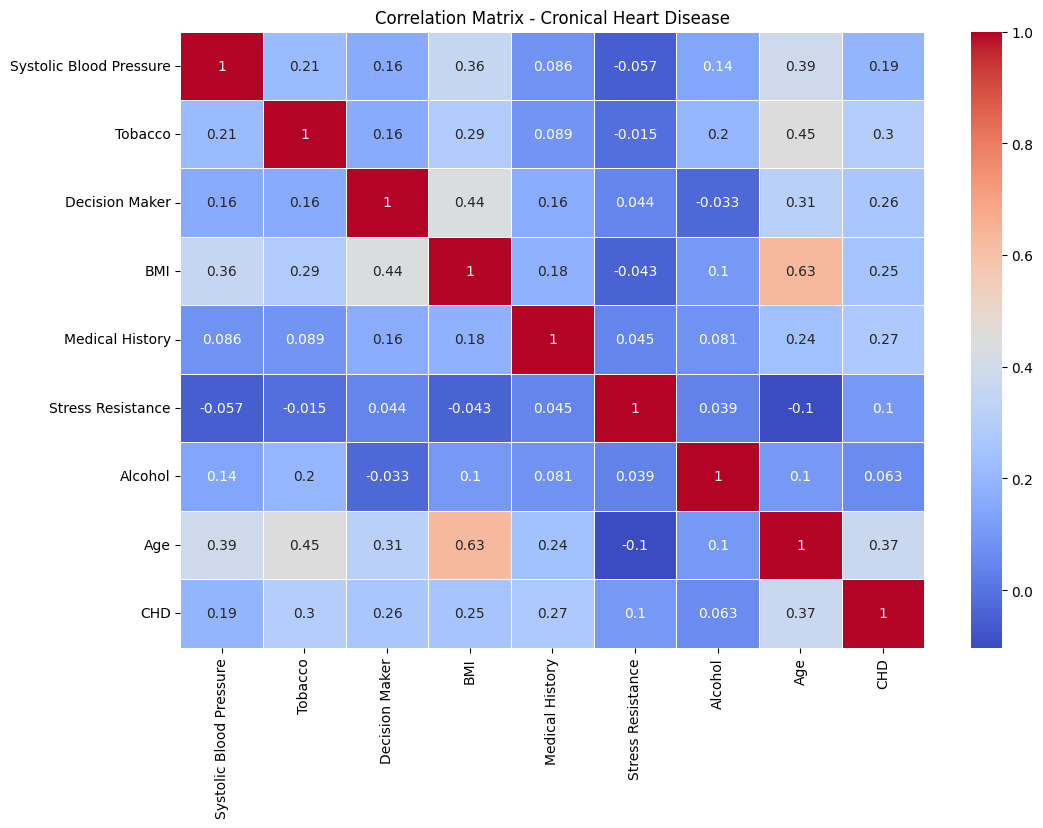

In [180]:
# Generate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix - Cronical Heart Disease')
plt.show()

In [181]:
X = df.drop('CHD', axis=1)
y = df.CHD
training_features, testing_features, training_target, testing_target = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42)

In [182]:
# TPOT



# Initialize TPOTClassifier
#tpot = TPOTClassifier(generations=100, population_size=100, verbosity=2, random_state=42)
#tpot.fit(X_train, y_train)
#print(tpot.score(X_test, y_test))
#tpot.export('tpot_patient_no_show_pipeline_classifier.ipynb')

In [183]:
# Feature Importance

# Average CV score on the training set was: 0.7283229813664597
exported_pipeline = make_pipeline(
    ZeroCount(),
    MaxAbsScaler(),
    KNeighborsClassifier(n_neighbors=55, p=2, weights="uniform")
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_test)

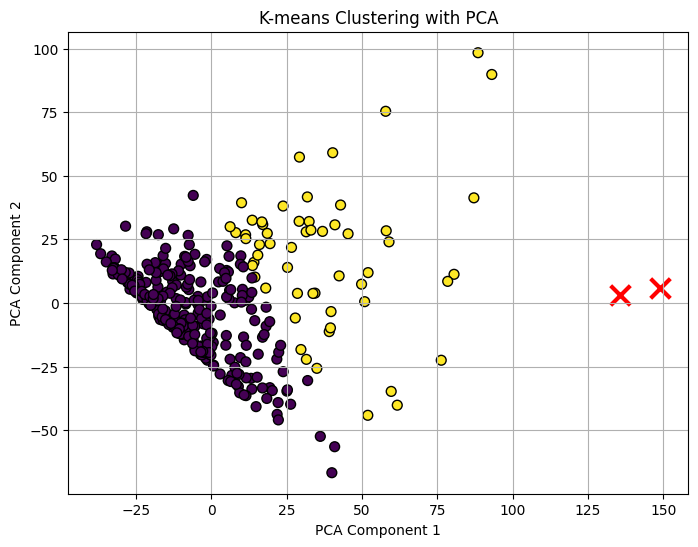

In [184]:
# Clustering

# Scale the features using MaxAbsScaler
#scaler = MaxAbsScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)



# Perform PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(training_features)

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(training_features)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3)
plt.title('K-means Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

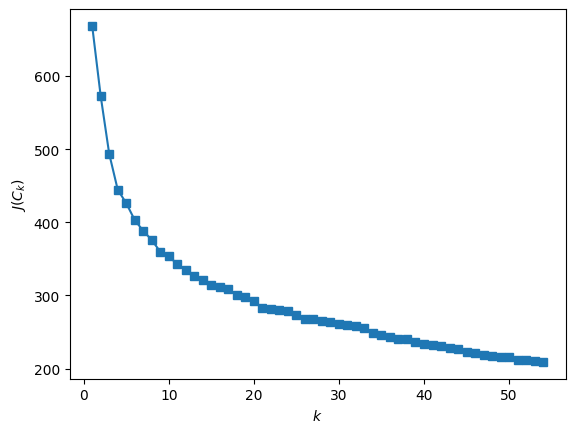

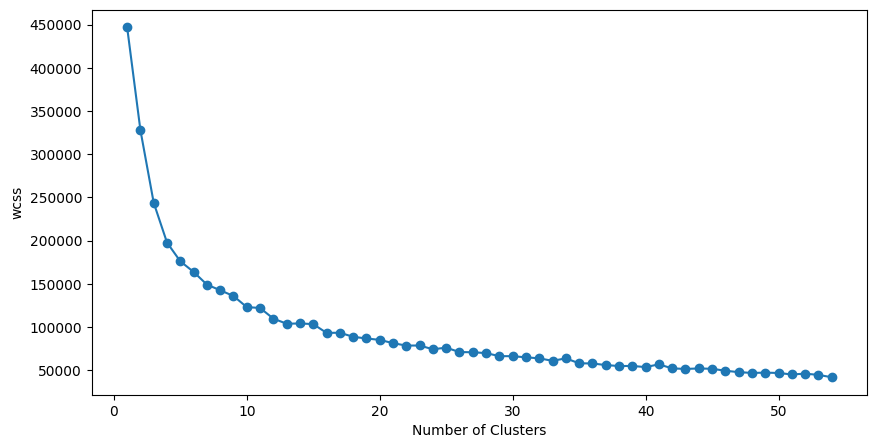

In [185]:
# K Means Clustering
inertia = []
for k in range(1, 55):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X_train)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 55), inertia, marker='s')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')

wcss= []
for i in range (1,55):
    kmeans_object= KMeans(i)
    kmeans_object.fit(X_train)
    wcss.append(kmeans_object.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1,55), wcss, marker= 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

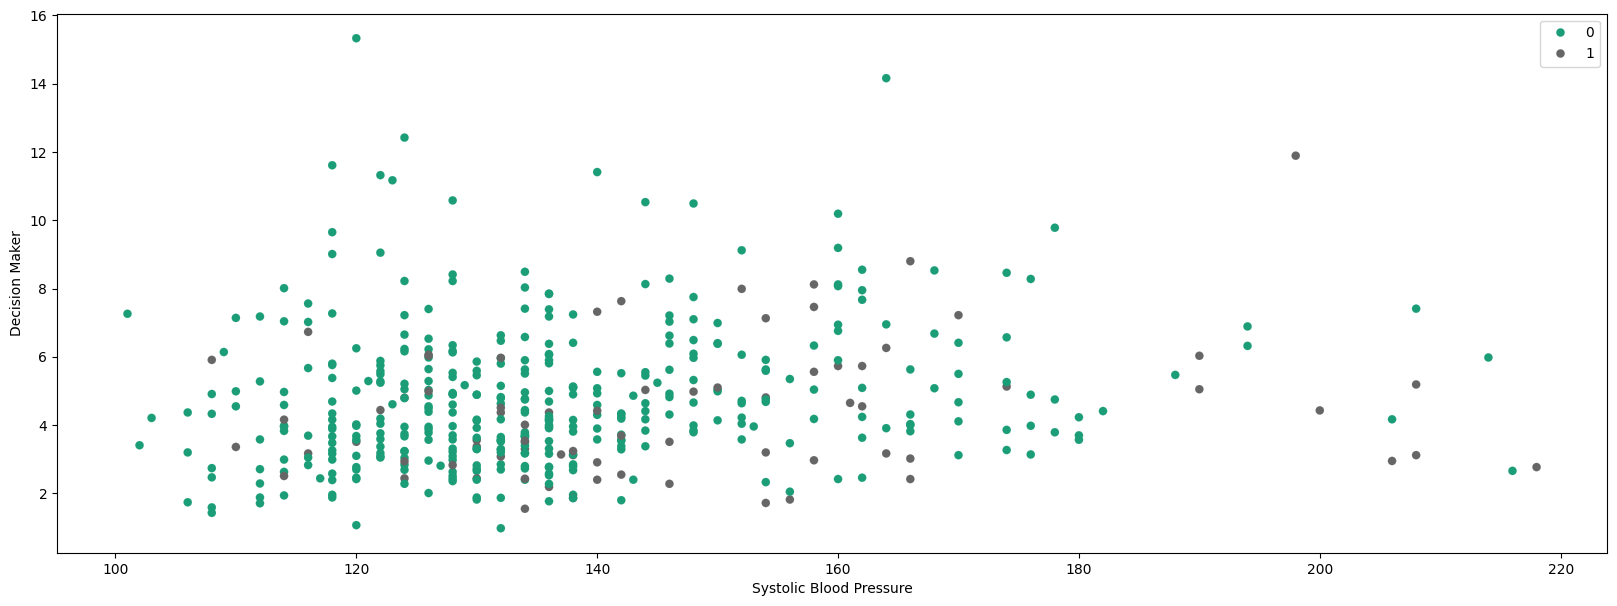

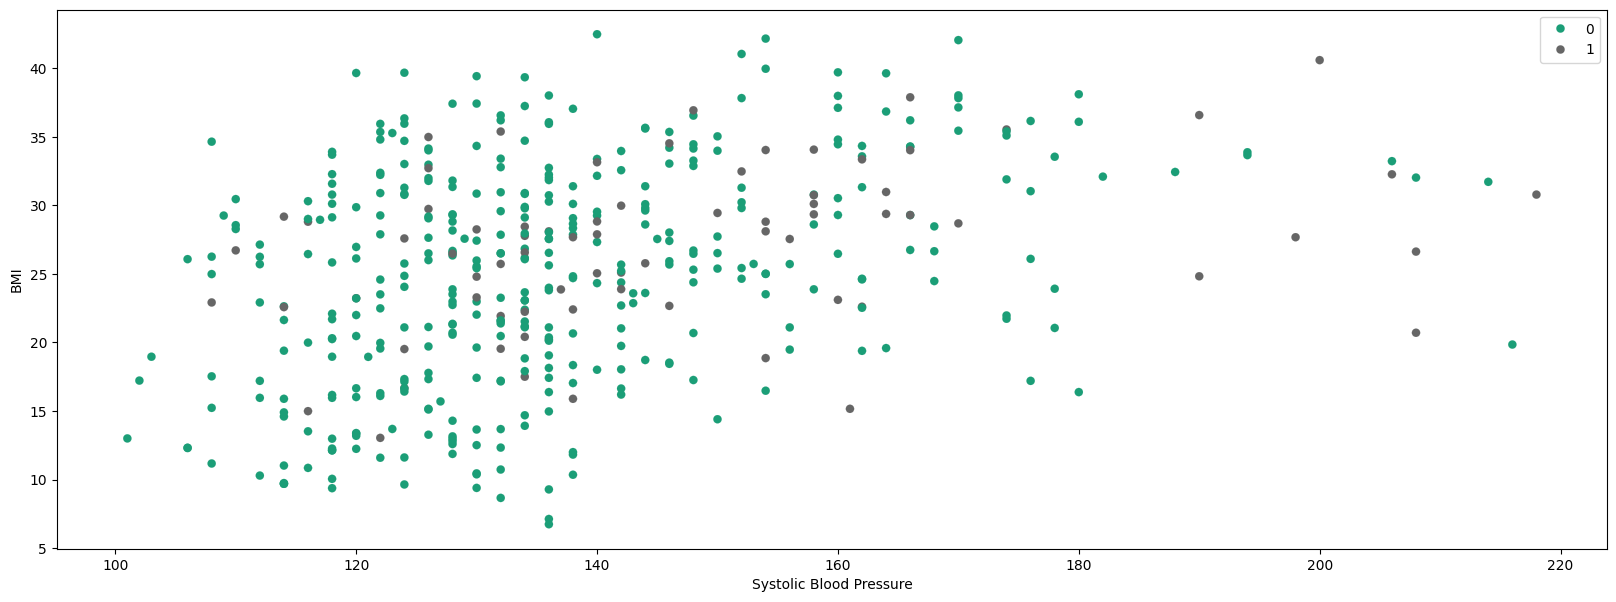

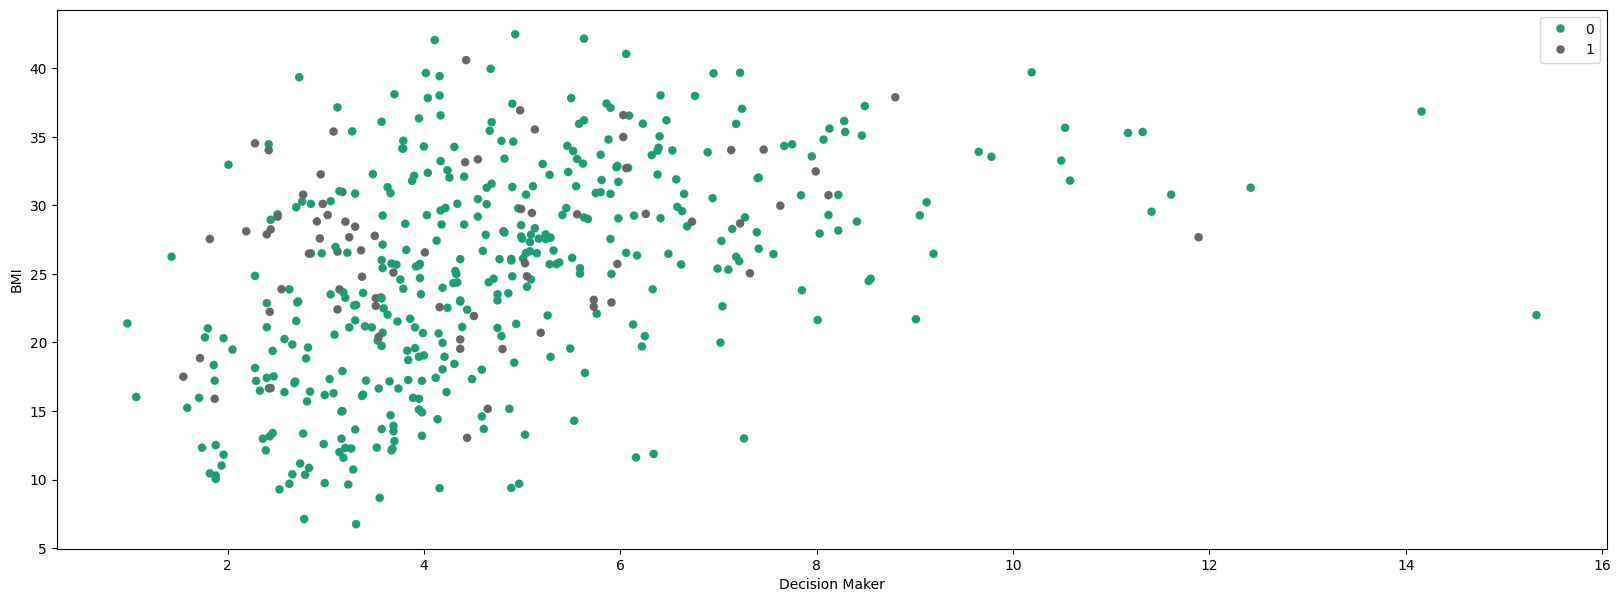

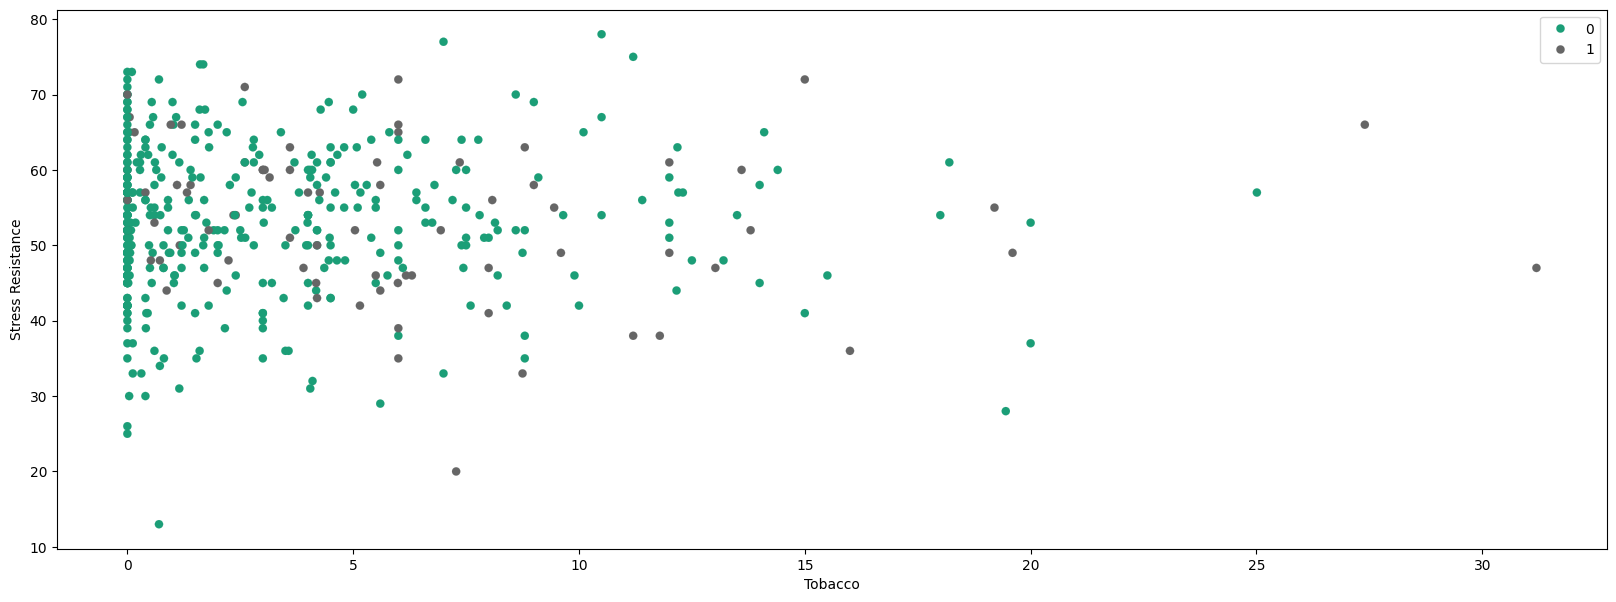

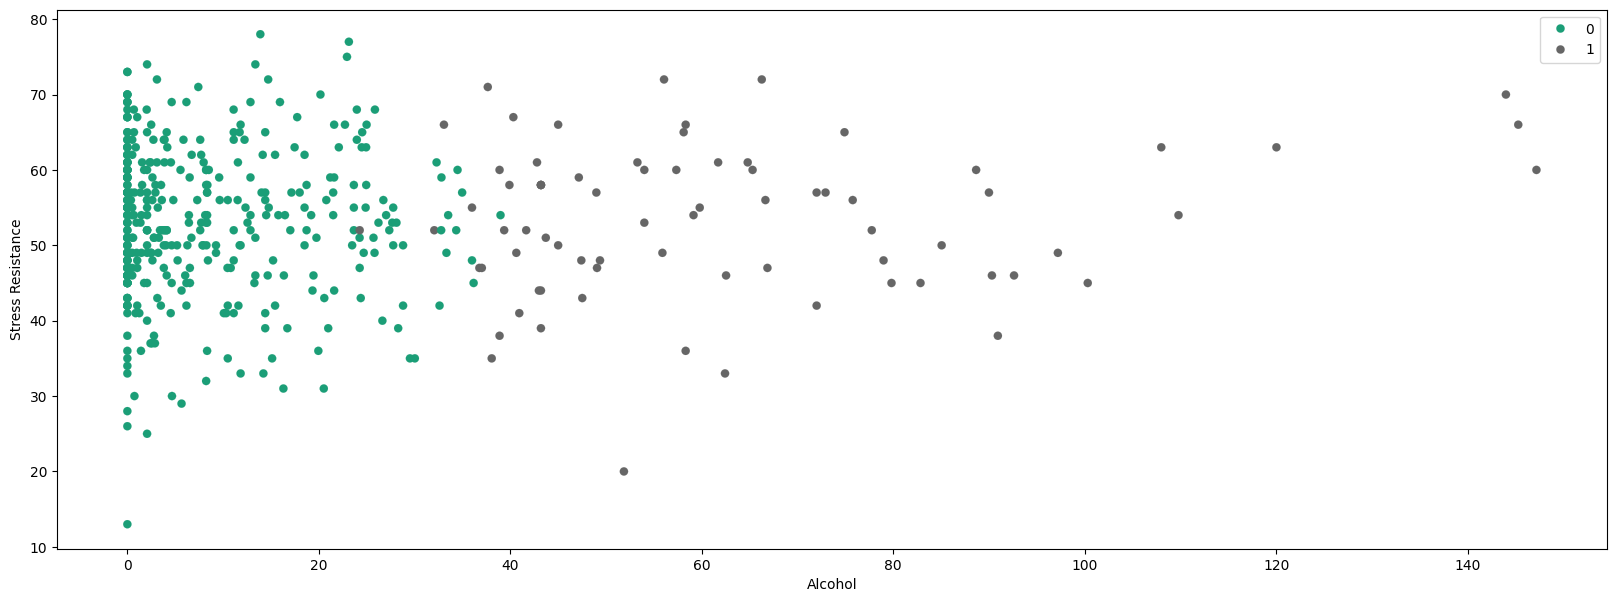

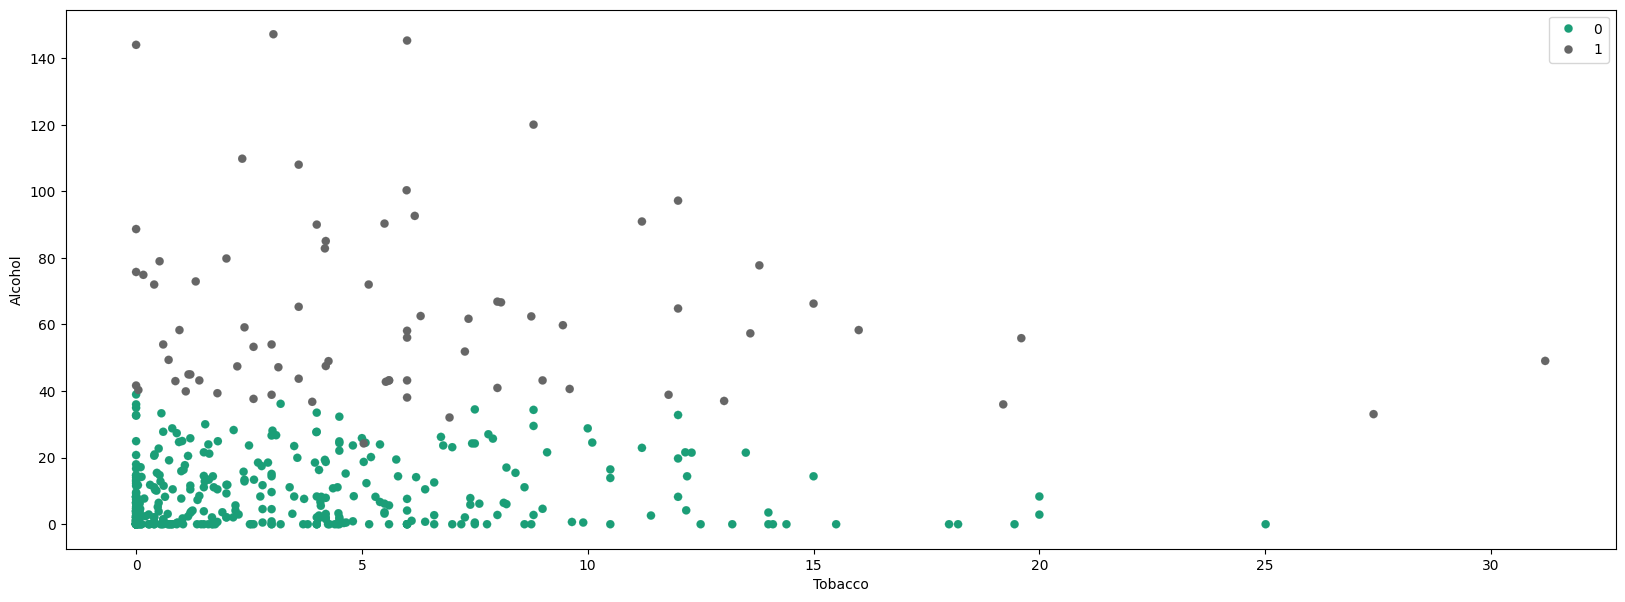

In [186]:
# Plotting

def plot2D(x, y, labels, x_label, y_label):
    fig = plt.figure(figsize=(20,7))
    ax = fig.add_subplot()

    scatter = ax.scatter(x, y, c = labels, cmap="Dark2", linewidths = 0.1)
    ax.legend(*scatter.legend_elements())

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

from sklearn.cluster import KMeans

def kmeans(df, n_clusters):
    kmeans = KMeans(n_clusters = n_clusters)
    kmeans.fit(df)

    return kmeans.labels_

labels = kmeans(X, 2)

plot2D(X['Systolic Blood Pressure'], X['Decision Maker'], labels, 'Systolic Blood Pressure', 'Decision Maker')
plot2D(X['Systolic Blood Pressure'], X['BMI'], labels, 'Systolic Blood Pressure', 'BMI')
plot2D(X['Decision Maker'], X['BMI'], labels, 'Decision Maker', 'BMI')
plot2D(X['Tobacco'], X['Stress Resistance'], labels, 'Tobacco', 'Stress Resistance')
plot2D(X['Alcohol'], X['Stress Resistance'], labels, 'Alcohol', 'Stress Resistance')
plot2D(X['Tobacco'], X['Alcohol'], labels, 'Tobacco', 'Alcohol')

In [187]:
# Predictions K

# Average CV score on the training set was: 0.7283229813664597
exported_pipeline = make_pipeline(
    ZeroCount(),
    MaxAbsScaler(),
    KNeighborsClassifier(n_neighbors=55, p=2, weights="uniform")

#    SelectFwe(score_func=f_classif, alpha=0.044),
#    StackingEstimator(estimator=GaussianNB()),
#    ExtraTreesClassifier(bootstrap=True, criterion="gini", max_features=0.8, min_samples_leaf=13, min_samples_split=20, n_estimators=100)

)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

[[71  4]
 [25 16]]
              precision    recall  f1-score   support

           0       0.74      0.95      0.83        75
           1       0.80      0.39      0.52        41

    accuracy                           0.75       116
   macro avg       0.77      0.67      0.68       116
weighted avg       0.76      0.75      0.72       116

Training accuracy: 0.7225433526011561
Testing accuracy: 0.75


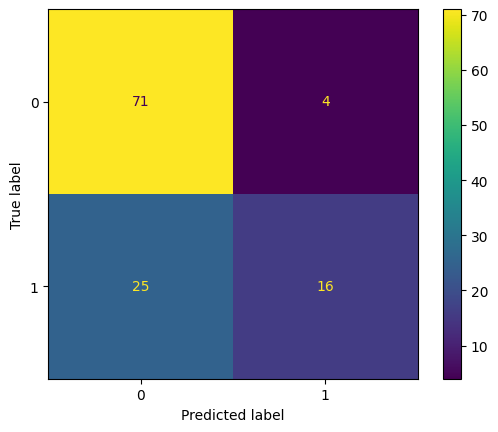

In [188]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, f1_score, ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score

precision_recall_fscore_support(testing_target, results, average='macro')

print(confusion_matrix(testing_target, results))
print(classification_report(testing_target, results))
print('Training accuracy:', exported_pipeline.score(training_features, training_target))
print('Testing accuracy:', accuracy_score(testing_target, results))

ConfusionMatrixDisplay.from_predictions(testing_target, results)
plt.show()

In [189]:
import shap

explainer = shap.Explainer(exported_pipeline.predict, training_features)
shap_values = explainer(testing_features)

# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.beeswarm(shap_values)

ExactExplainer explainer:  48%|████▊     | 56/116 [00:52<00:59,  1.01it/s]

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

print(confusion_matrix(testing_target, results))
print(classification_report(testing_target, results))
print('Training accuracy:', exported_pipeline.score(training_features, training_target))
print('Testing accuracy:', accuracy_score(testing_target, results))

dot_data = export_graphviz(exported_pipeline, out_file=None, class_names=['Was', 'Was not'], 
                           feature_names=df.drop("CHD", axis=1).columns, impurity=False, filled=True)
graph = graphviz.Source(dot_data)
graph.render('tree')
graph

ModuleNotFoundError: No module named 'graphviz'